## Name : Supragya Sood

## Data Science and Business analytics Internship

### Task - 1 
### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ trying to find out the weak areas to work on and  to make more profits.

#### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading and Understanding the data 

In [2]:
store = pd.read_csv('SampleSuperstore.csv')

In [3]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
store.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

In [7]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### No null values

## Visualizing the data

### Checking the count of values for each state to get a basic understanding

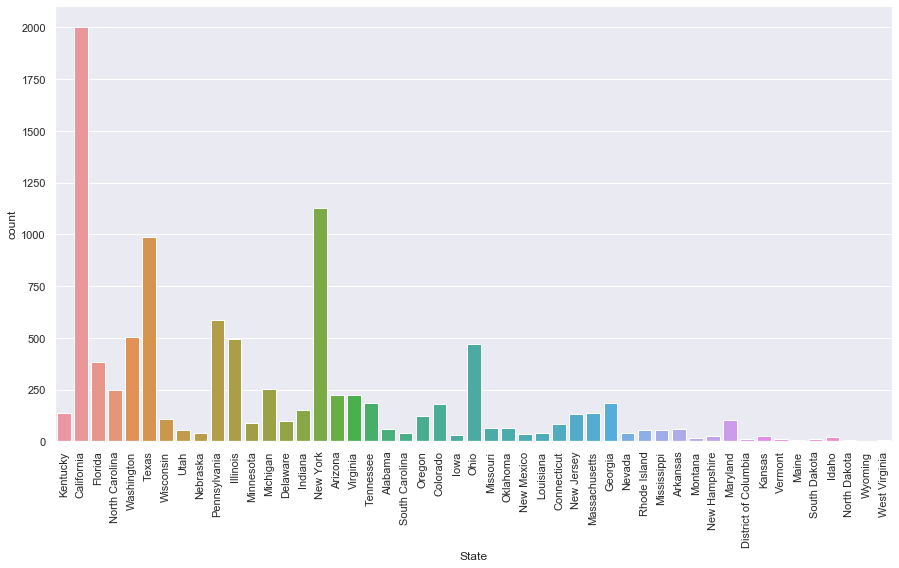

In [10]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x="State", data=store)
plt.xticks(rotation=90)
plt.show()

### California ,  New York and Texas are the states with highest count 

### Grouping by State to check Sales and Profit

In [11]:
state_agg = pd.DataFrame(store.groupby('State')['Profit','Sales'].sum()).reset_index()

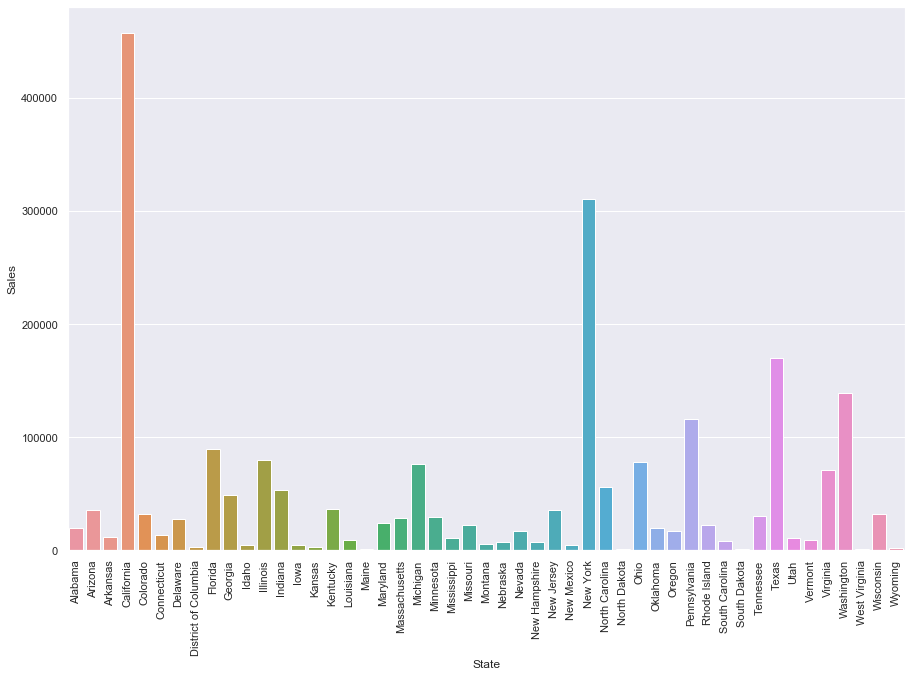

In [12]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(state_agg['State'],state_agg['Sales'])

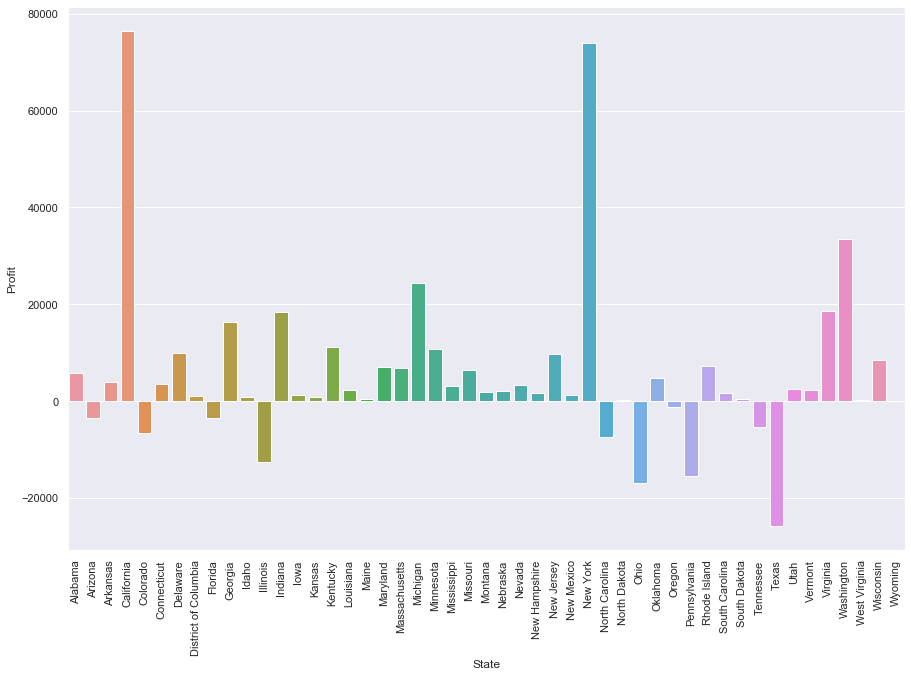

In [13]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(state_agg['State'],state_agg['Profit'])

### California and New York generate highest Profits 

### a few states including Texas, Pennsylvania , Ohio , North Carolina are generating negative Profits from the Sales, so sales for these states should be taken care of 

### Grouping the data by category to check which category has highest sales and profit

In [14]:
cate_sales = pd.DataFrame(store.groupby('Category')['Sales','Profit'].sum()).reset_index()

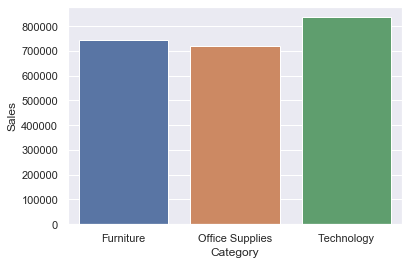

In [16]:

sns.barplot(cate_sales['Category'],cate_sales['Sales'])

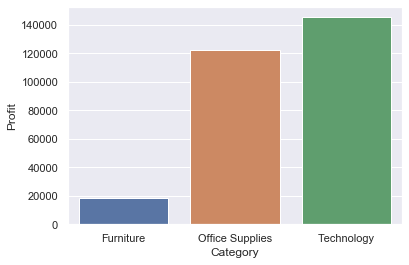

In [17]:
sns.barplot(cate_sales['Category'],cate_sales['Profit'])

### Although Sales of Furniture looks good but the Profit is far less

In [18]:
subcat = pd.DataFrame(store.groupby('Sub-Category')['Profit','Sales'].sum()).reset_index()

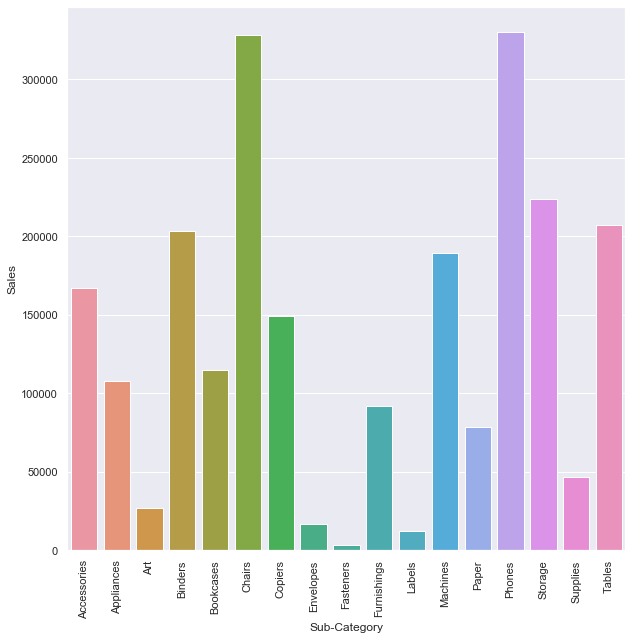

In [19]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(subcat['Sub-Category'],subcat['Sales'])

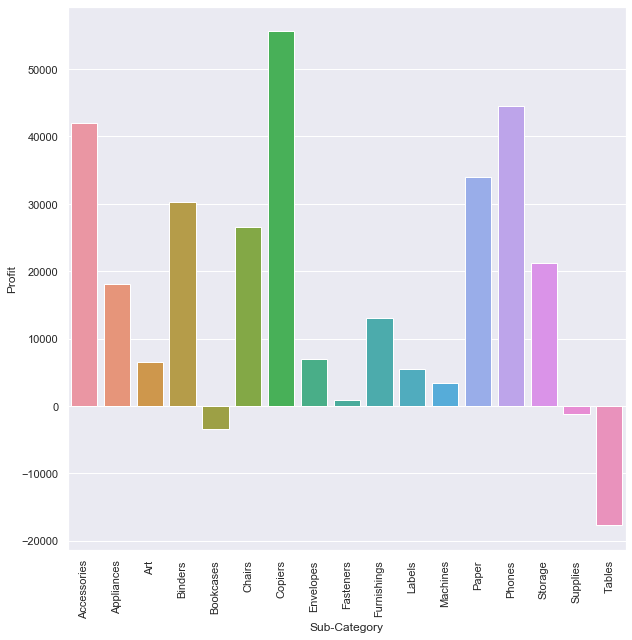

In [20]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(subcat['Sub-Category'],subcat['Profit'])

### Tables,Bookcases and Supplies have good sales but the profit bar reveals that these 3 sub categories are causing loss. So it needs to be taken care of

### Grouping by Segment and Checking the agg values of Quantity,Sales and Profit

In [21]:
seg_agg = pd.DataFrame(store.groupby('Segment')['Sales','Profit'].sum()).reset_index()

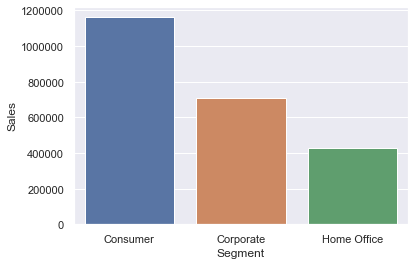

In [23]:
sns.barplot(seg_agg['Segment'],seg_agg['Sales'])

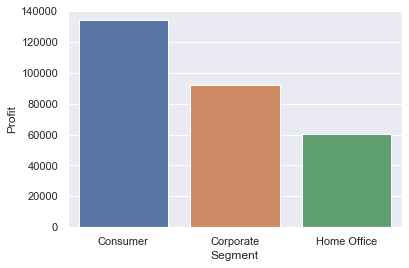

In [24]:
sns.barplot(seg_agg['Segment'],seg_agg['Profit'])

### Consumer Segment ranks 1st when it comes to sales and Profits followed by Corporate Segment

### Grouping by region

In [25]:
#Region_aggregate

Reg_agg = pd.DataFrame(store.groupby('Region')['Sales','Profit'].sum()).reset_index()

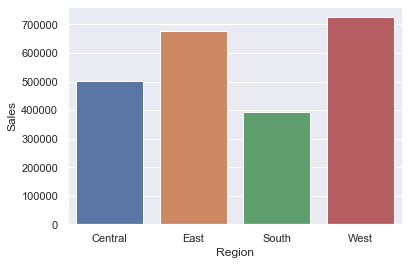

In [27]:
sns.barplot(Reg_agg['Region'],Reg_agg['Sales'])

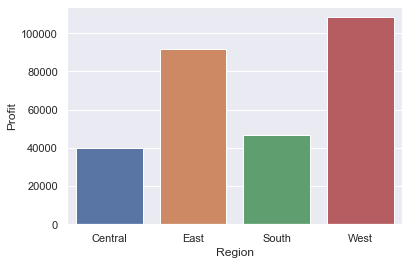

In [28]:
sns.barplot(Reg_agg['Region'],Reg_agg['Profit'])

#### East and West Regions have more sales than Central and South Regions